# Tarea #1

# Estudiantes
    John Sánchez Cespedes 3021080092
    Luis Carlos Navarro Todd 2022212158
    Victoria Sandí Barrantes 2022146536

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Análisis Exploratorio de Datos (EDA) y Limpieza
Abrir los datos con pandas:

In [3]:
dataset=pd.read_csv('./house_price_regression_dataset.csv')
dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Se puede observar que el dataset se abre de forma correcta.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Square_Footage,1000.0,2815.422000,1255.514921,503.000000,1749.500000,2862.500000,3849.500000,4.999000e+03
Num_Bedrooms,1000.0,2.990000,1.427564,1.000000,2.000000,3.000000,4.000000,5.000000e+00
Num_Bathrooms,1000.0,1.973000,0.820332,1.000000,1.000000,2.000000,3.000000,3.000000e+00
Year_Built,1000.0,1986.550000,20.632916,1950.000000,1969.000000,1986.000000,2004.250000,2.022000e+03
Lot_Size,1000.0,2.778087,1.297903,0.506058,1.665946,2.809740,3.923317,4.989303e+00
Garage_Size,1000.0,1.022000,0.814973,0.000000,0.000000,1.000000,2.000000,2.000000e+00
Neighborhood_Quality,1000.0,5.615000,2.887059,1.000000,3.000000,6.000000,8.000000,1.000000e+01
House_Price,1000.0,618861.018647,253568.058375,111626.853424,401648.228909,628267.291129,827141.277637,1.108237e+06


## Tratar Nulos

In [6]:
dataset.isna().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

Como se puede observar, no hay datos nulos en el dataset

## Manejar Outliers

<Axes: xlabel='Square_Footage'>

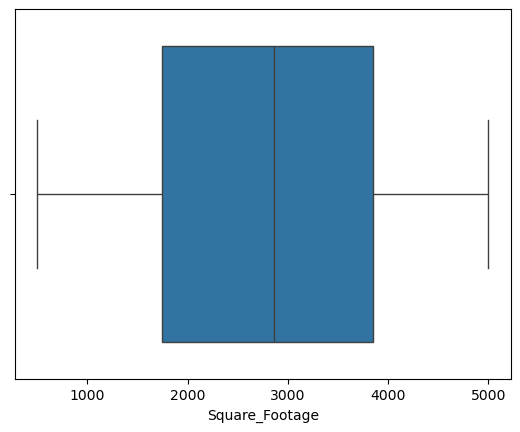

In [7]:
sns.boxplot(dataset,x='Square_Footage')

Para manejar los outliers se utilizará la técnica de IQR o rango intercuantílico

In [8]:

q1=dataset.quantile(.25)
q3=dataset.quantile(.75)
IQR=q3-q1
LowerBound=q1-1.5*IQR
UpperBound=q3+1.5*IQR
dataset=dataset[(dataset>LowerBound)&(dataset<UpperBound)]



In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Como se puede observar, no hubo instancias fuera del rango. Por lo tanto, no hay outliers

## 2. Selección de Características
Mapa de calor de la matriz de correlación de pearson:

<Axes: >

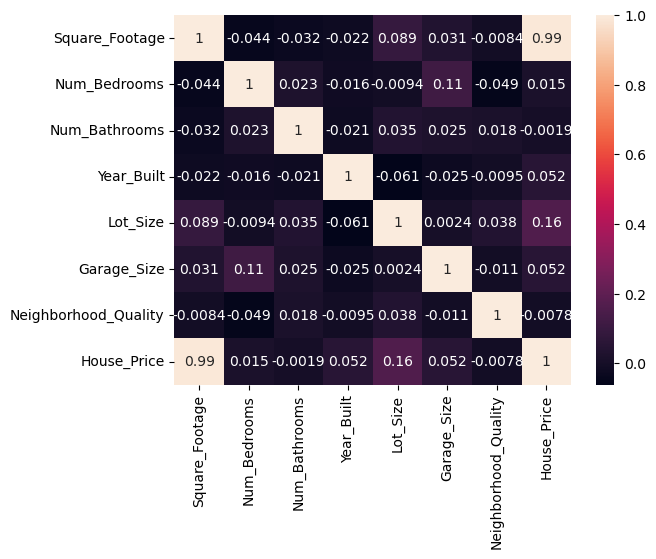

In [10]:
sns.heatmap(dataset.corr('pearson'),annot=True)

Mapa de calor de la matriz de correlación de spearman:

<Axes: >

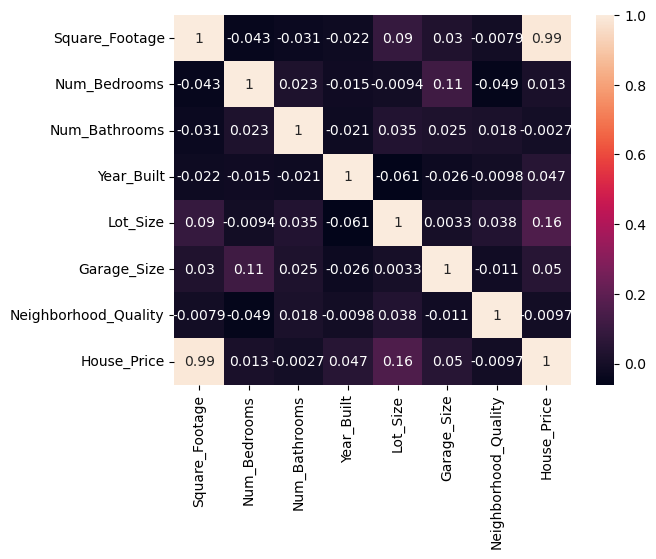

In [11]:
sns.heatmap(dataset.corr('spearman'),annot=True)

Como se puede observar, las variables con mayor correlación con el precio de la casa son los pies cuadrados, el año de construcción, el tamaño del lote y el tamaño del garaje. Todos estos datos alcanzan una correlación mayor a 0.05, por lo tanto se utilizarán para entrenar un modelo. También se hará un modelo con el tamaño del lote y los pies cuadrados únicamente. Que son los únicos 2 con correlación > 0.1.

## 3. Normalización de los datos


In [12]:
# Normalizacion de los datos
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

## 4. Creación de un dataframe


In [13]:
columns = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 
            'Year_Built', 'Lot_Size', 'Garage_Size', 
            'Neighborhood_Quality', 'House_Price']

dataset = pd.DataFrame(data=dataset, columns=columns)
dataset.head(2)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126,-1.406552
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420,1.445699


## 5. Division de los datos
La división de datos se hace con random sampling, haciendo un shuffle de los datos.

#### División de dataset con todos los features

In [14]:
X = dataset.drop(["House_Price"], axis=1)
y = dataset["House_Price"]

# se dividen los sets (70% - 15% - 15%)

# Divide en entrenamiento (70%) y el resto (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, shuffle=True)



#### División de dataset con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje

In [15]:
X1 = dataset.drop(["House_Price", "Num_Bedrooms", "Num_Bathrooms", "Neighborhood_Quality"], axis=1)
y1 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, random_state=0, shuffle=True)

#### División de dataset con pies cuadrados y tamaño del lote

In [16]:
X2 = dataset.drop(["House_Price", "Num_Bedrooms", "Year_Built", "Num_Bathrooms", "Garage_Size", "Neighborhood_Quality"], axis=1)
y2 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, random_state=0, shuffle=True)

#### División de dataset con pies cuadrados únicamente

In [17]:
X3 = dataset.drop(["House_Price", "Num_Bedrooms", "Year_Built", "Num_Bathrooms", "Garage_Size", "Neighborhood_Quality", "Lot_Size"], axis=1)
y3 = dataset["House_Price"]

# se dividen los sets 
# Divide en entrenamiento (70%) y el resto (30%)
X3_train, X3_temp, y3_train, y3_temp = train_test_split(X3, y3, test_size=0.3, random_state=0, shuffle=True)

# Divide el 30% restante en validación (15%) y prueba (15%)
X3_val, X3_test, y3_val, y3_test = train_test_split(X3_temp, y3_temp, test_size=0.5, random_state=0, shuffle=True)

## 6. Entrenamiento
### Implementación de Regresión Lineal

In [18]:
def modelo(x, w, b):
    '''
    Calcula la regresión lineal basada en los parámetros w y b con respecto a x.

    Parámetros:
    x (array-like): Vector de características.
    w (array-like): Vector de pesos.
    b (float): Bias (también conocido como sesgo).

    Retorna:
    array-like: Resultado de la regresión lineal.
    '''

    return w*x + b

#### Cálculo de error

In [19]:
def MSE(y, output):
    return (output-y)**2

#### Funciones para Actualización de Parámetros

In [20]:
def derivada_L_w(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto W
    output = wx+b
    '''
    return 2*x*(output - y)

In [21]:
def derivada_L_b(x, y, output):
    '''
    Calcula el resultado de la derivada de L respecto b
    output = wx+b
    '''
    return 2*(output-y)

### Funciones de Graficación
#### Función de Gráfico de MSE

In [22]:
def plotMSE(historial_mse_epochs, historial_mse_validacion):
    # Puntos de cada MSE
    epochs, mses = zip(*historial_mse_epochs)

    plt.figure(figsize=(8, 5))
    
    # Graficar la curva de entrenamiento
    plt.plot(epochs, mses, label="Train MSE", color='red', marker='o', linestyle='-')

    # Si hay datos de validación, graficarlos también
    if historial_mse_validacion:
        epochs_val, mses_val = zip(*historial_mse_validacion)
        plt.plot(epochs_val, mses_val, label="Validation MSE", color='blue', marker='s', linestyle='--')

    # Etiquetas y formato
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title(f'Curva de Error | Época {max(epochs)}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Training

In [23]:
def generar_params_iniciales(*dimensiones_w):
    w = np.random.rand(*dimensiones_w)
    b = np.random.default_rng().random()
    return w, b

In [24]:
def entrenar(training_dataset, training_labels, validation_dataset, validation_labels, epochs = 400, alfa = 0.005, plot_cada_n=-1):
    w, b = generar_params_iniciales(*training_dataset.columns.shape)

    print(f"Valores iniciales:, B = {b:.5F}, W =", w)

    historial_error_epochs = []
    historial_error_validacion = []

    # Época
    for epoch in range(epochs+1):
        errores_por_instancia = []
        derivadas_w = []
        derivadas_b = []
        for (x, y) in zip(training_dataset.values, training_labels):
            # Correr el modelo por cada instancia y calcular su error y funcion de pérdida
            output = modelo(x, w, b)
            error = MSE(y, output)
            errores_por_instancia.append(error)
            derivada_w = derivada_L_w(x, y, output)
            derivadas_w.append(derivada_w)
            derivada_b = derivada_L_b(x, y, output)
            derivadas_b.append(derivada_b)

        # Cálculo de Promedios
        promedio_dw = np.mean(derivadas_w, axis=0)
        promedio_db = np.mean(derivadas_b)
        promedio_error = np.mean(errores_por_instancia)
        
        historial_error_epochs.append((epoch, promedio_error))

        # Actualización de Parámetros
        w = w - alfa*promedio_dw
        b = b - alfa*promedio_db

        # Validación
        errores_validacion = []
        for (x_val, y_val) in zip(validation_dataset.values, validation_labels):
            output_val = modelo(x_val, w, b)
            errores_validacion.append(MSE(y_val, output_val))
        
        promedio_error_validacion = np.mean(errores_validacion)

        # Guardar los errores en el historial
        historial_error_validacion.append((epoch, promedio_error_validacion))

        if plot_cada_n > 0 and epoch != 0 and epoch % plot_cada_n == 0:
            print(f"Época {epoch}:")
            print(f"   → Loss (Training) = {promedio_error:.5F}")
            print(f"   → Loss (Validation) = {promedio_error_validacion:.5F}")
            plotMSE(historial_error_epochs, historial_error_validacion)
    
    return w, b


## Testing

In [25]:
def testear(w, b, testing_dataset, testing_labels, ):
    errores_por_instancia = []
    for (x, y) in zip(testing_dataset.values, testing_labels):
        output = modelo(x, w, b)
        error = MSE(output, y)
        errores_por_instancia.append(error)

    promedio_error = np.mean(errores_por_instancia)
    
    print(f"Valor de función de perdida (Loss Function) para testing = {promedio_error:.5F}")


# Ejecuciones:
## Correr training con todos los features

Valores iniciales:, B = 0.04254, W = [0.80901944 0.52167125 0.17649364 0.48004918 0.25686142 0.45183971
 0.33208233]
Época 400:
   → Loss (Training) = 0.85936
   → Loss (Validation) = 0.77956


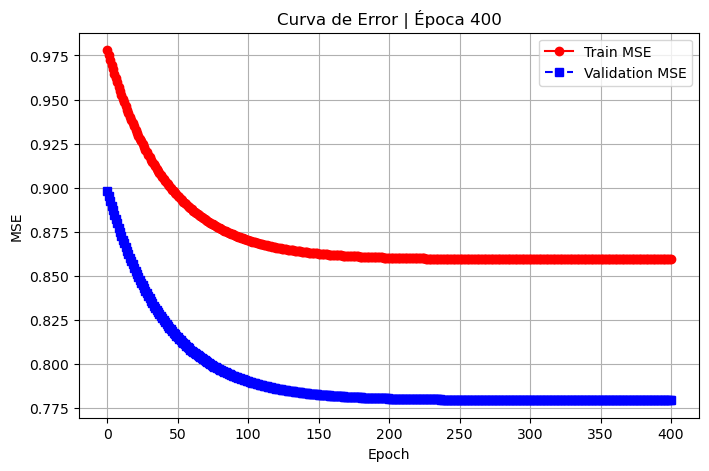

Valor de función de perdida (Loss Function) para testing = 0.91269


In [26]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=400, alfa=0.006, plot_cada_n=400)
testear(w, b, X_test, y_test)

Valores iniciales:, B = 0.17108, W = [0.86821005 0.94429614 0.5688971  0.34410413 0.45664688 0.34387032
 0.64447385]
Época 600:
   → Loss (Training) = 0.85960
   → Loss (Validation) = 0.77917


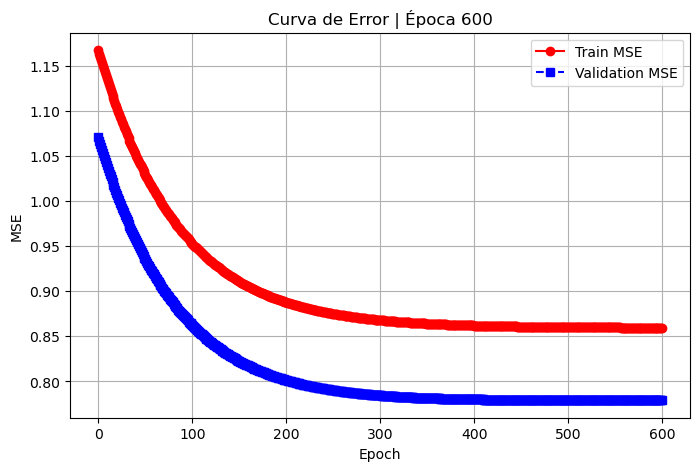

Valor de función de perdida (Loss Function) para testing = 0.91166


In [27]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=600, alfa=0.003, plot_cada_n=600)
testear(w, b, X_test, y_test)

In [28]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=800, alfa=0.006)
testear(w, b, X_test, y_test)

Valores iniciales:, B = 0.68090, W = [0.26397263 0.11000487 0.85088981 0.88358258 0.14342763 0.0343168
 0.49294661]
Valor de función de perdida (Loss Function) para testing = 0.91298


In [29]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=1000, alfa=0.002)
testear(w, b, X_test, y_test)

Valores iniciales:, B = 0.86202, W = [0.41626665 0.95936776 0.68345702 0.76289984 0.97477184 0.80583911
 0.15178277]
Valor de función de perdida (Loss Function) para testing = 0.91210


#### Conclusión todos los features
Parece funcionar mejor con 400 epochs y alfa=0.006. Por lo tanto se define que el modelo funciona mejor con estos hiperparámetros y features.

Valores iniciales:, B = 0.71520, W = [0.89151985 0.44215857 0.41443761 0.40061985 0.93897184 0.68043137
 0.26088185]
Época 50:
   → Loss (Training) = 1.08525
   → Loss (Validation) = 0.93426


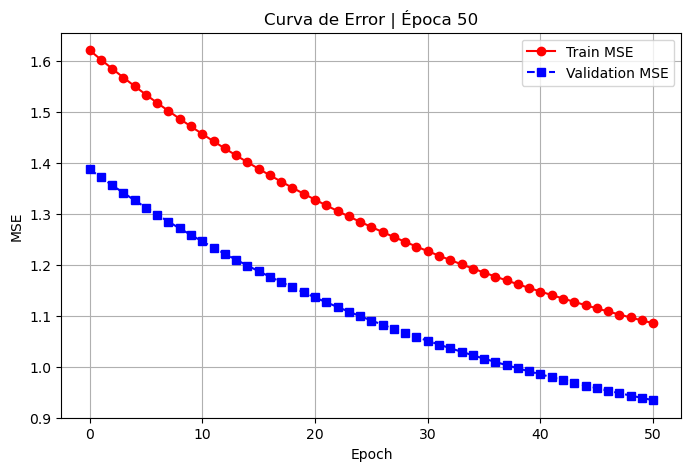

Época 100:
   → Loss (Training) = 0.92645
   → Loss (Validation) = 0.81156


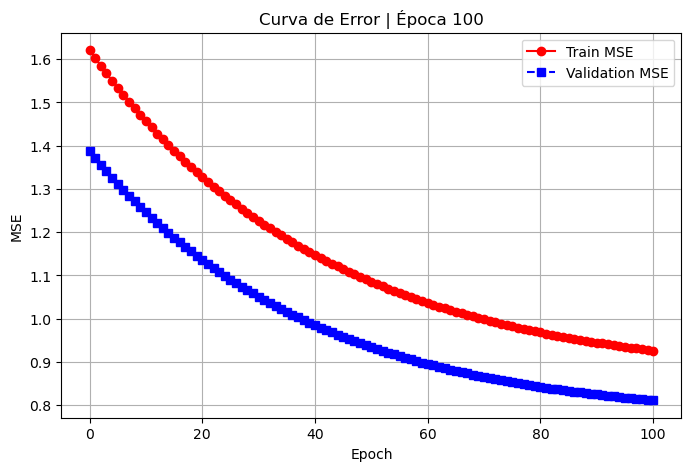

Época 150:
   → Loss (Training) = 0.87930
   → Loss (Validation) = 0.78151


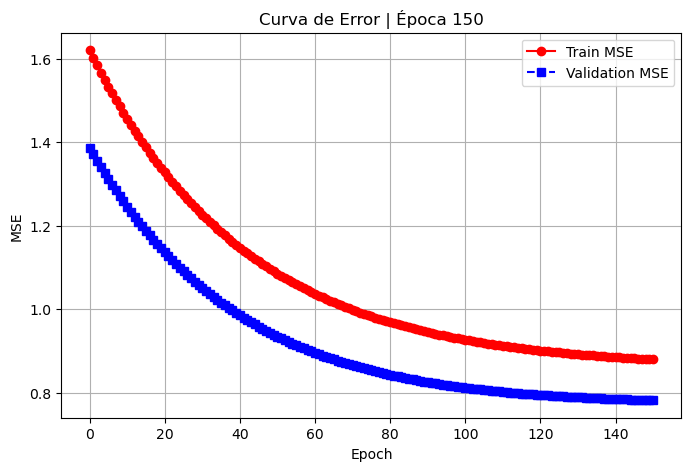

Época 200:
   → Loss (Training) = 0.86529
   → Loss (Validation) = 0.77604


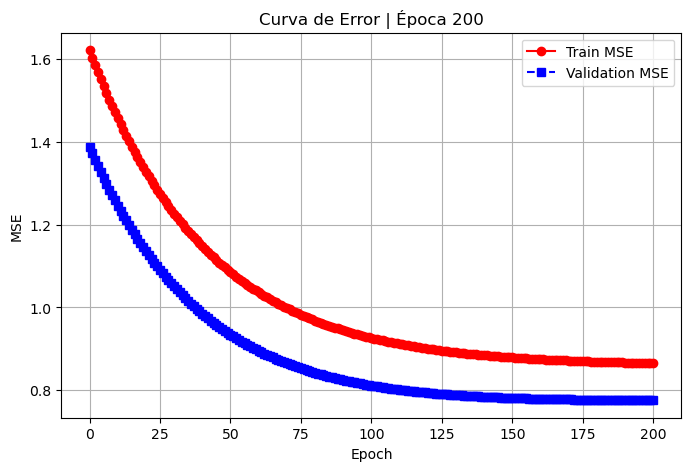

Época 250:
   → Loss (Training) = 0.86112
   → Loss (Validation) = 0.77629


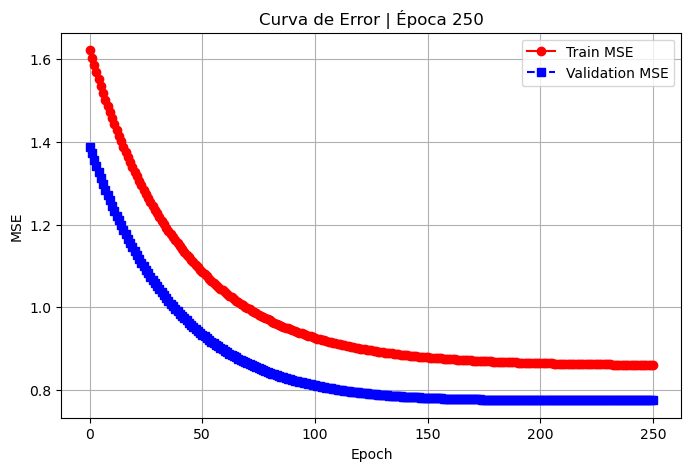

Época 300:
   → Loss (Training) = 0.85988
   → Loss (Validation) = 0.77738


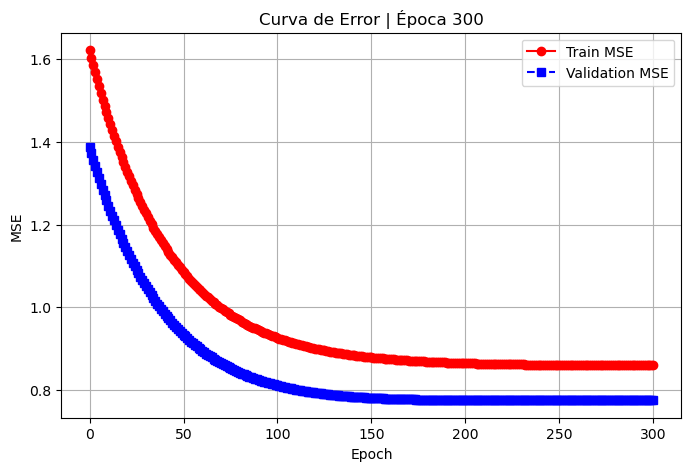

Época 350:
   → Loss (Training) = 0.85951
   → Loss (Validation) = 0.77825


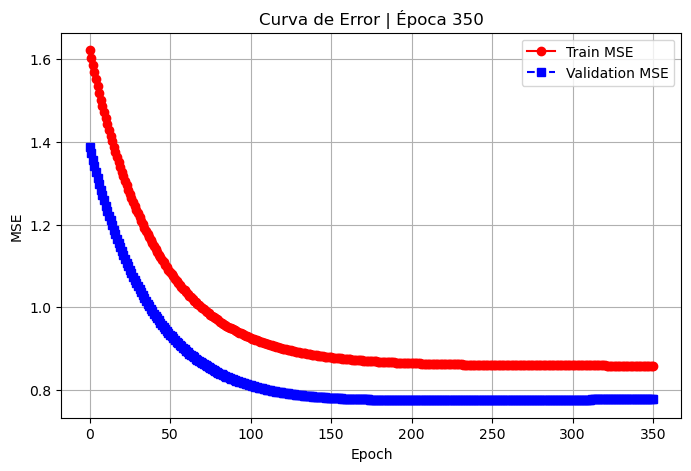

Época 400:
   → Loss (Training) = 0.85940
   → Loss (Validation) = 0.77881


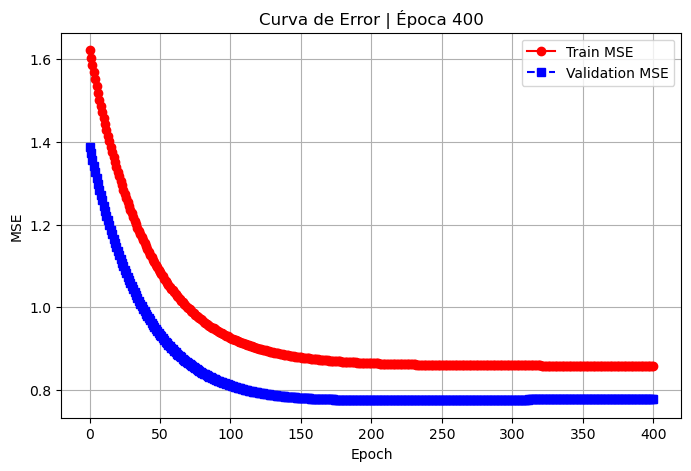

Valor de función de perdida (Loss Function) para testing = 0.91265


In [30]:
w, b = entrenar(X_train, y_train, X_val, y_val, epochs=400, alfa=0.006, plot_cada_n=50)
testear(w, b, X_test, y_test)

###

## Correr training con selección de features #1: Epochs 400 y Alfa: 0.006
Dataset con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje.

Valores iniciales:, B = 0.24728, W = [0.38835741 0.86000964 0.60653691 0.11463667]
Época 400:
   → Loss (Training) = 0.75076
   → Loss (Validation) = 0.68238


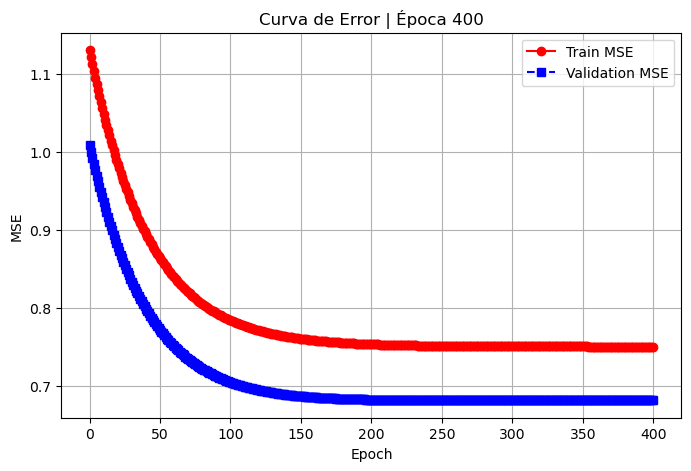

Valor de función de perdida (Loss Function) para testing = 0.79215


In [31]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.006, plot_cada_n=400)
testear(w, b, X1_test, y1_test)

Valores iniciales:, B = 0.96065, W = [0.73339276 0.41315687 0.29117242 0.36220508]
Época 250:
   → Loss (Training) = 0.75310
   → Loss (Validation) = 0.67742


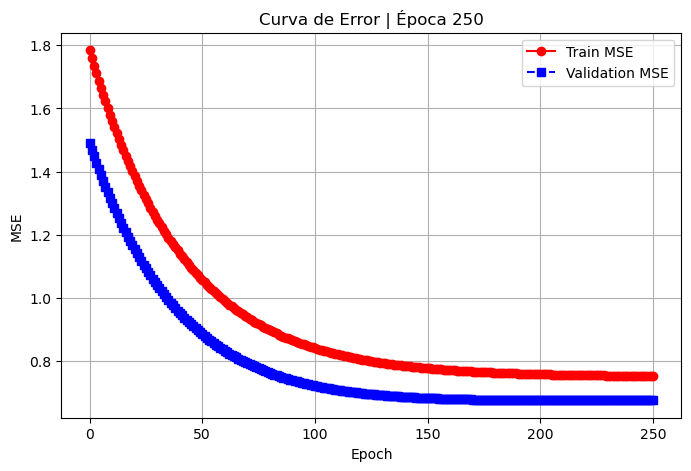

Valor de función de perdida (Loss Function) para testing = 0.79439


In [32]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=250, alfa=0.006, plot_cada_n=250)
testear(w, b, X1_test, y1_test)

Valores iniciales:, B = 0.45576, W = [0.95394922 0.80248624 0.71597069 0.41242858]
Época 600:
   → Loss (Training) = 0.75073
   → Loss (Validation) = 0.68256


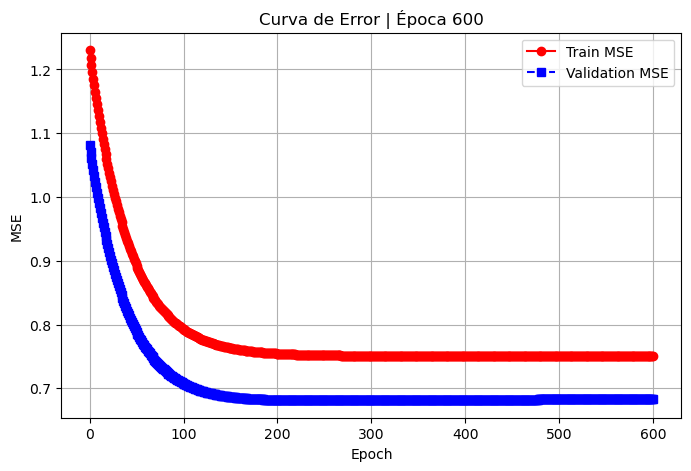

Valor de función de perdida (Loss Function) para testing = 0.79253


In [33]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=600, alfa=0.006, plot_cada_n=600)
testear(w, b, X1_test, y1_test)

Valores iniciales:, B = 0.11861, W = [0.89768245 0.42805106 0.47643694 0.13309522]
Época 400:
   → Loss (Training) = 0.75076
   → Loss (Validation) = 0.68244


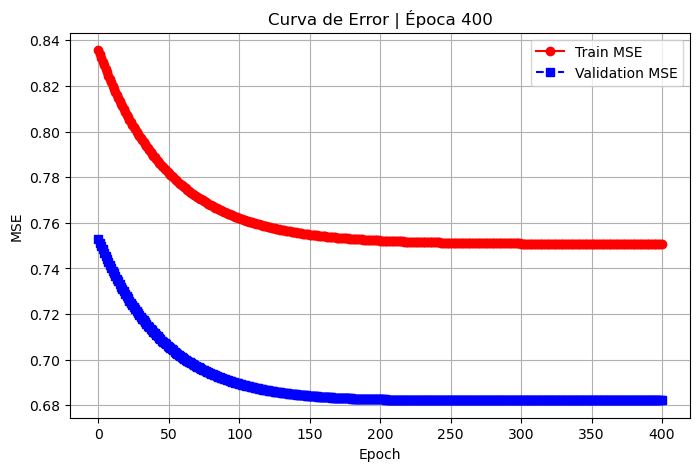

Valor de función de perdida (Loss Function) para testing = 0.79200


In [34]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.005, plot_cada_n=400)
testear(w, b, X1_test, y1_test)

Valores iniciales:, B = 0.97045, W = [0.58583321 0.5575933  0.12523397 0.68986497]
Época 400:
   → Loss (Training) = 0.75255
   → Loss (Validation) = 0.67872


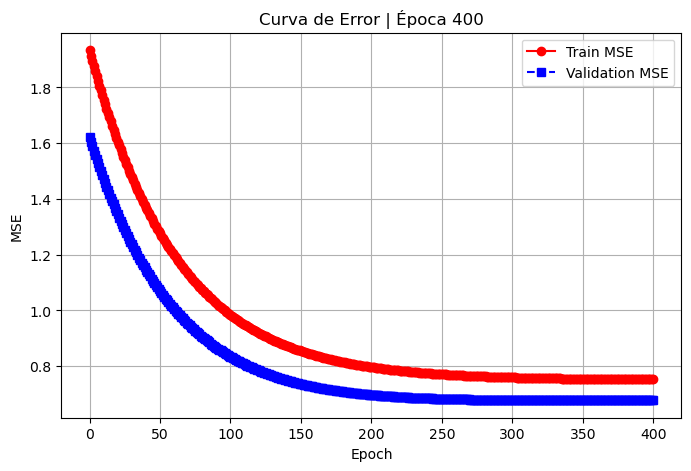

Valor de función de perdida (Loss Function) para testing = 0.79374


In [35]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.004, plot_cada_n=400)
testear(w, b, X1_test, y1_test)

#### Conclusión con selección de features #1
Parece que el modelo funciona mejor con 400 epochs y alfa = 0.005. Con un alfa menor el modelo empeora y con alfa mayor empieza a tener un valor de loss function para testing promedio mayor. 


Valores iniciales:, B = 0.63010, W = [0.03949097 0.32409943 0.58724178 0.99724861]
Época 80:
   → Loss (Training) = 0.93386
   → Loss (Validation) = 0.81381


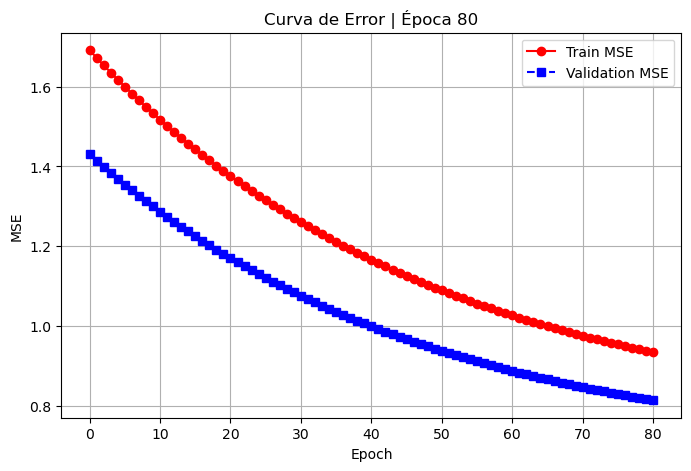

Época 160:
   → Loss (Training) = 0.78641
   → Loss (Validation) = 0.70198


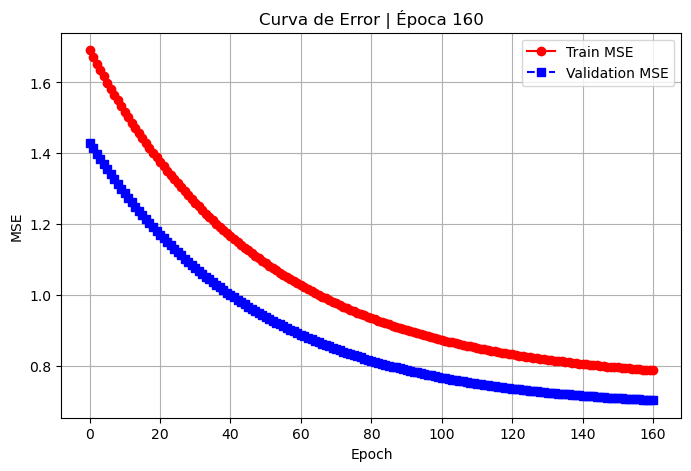

Época 240:
   → Loss (Training) = 0.75769
   → Loss (Validation) = 0.68371


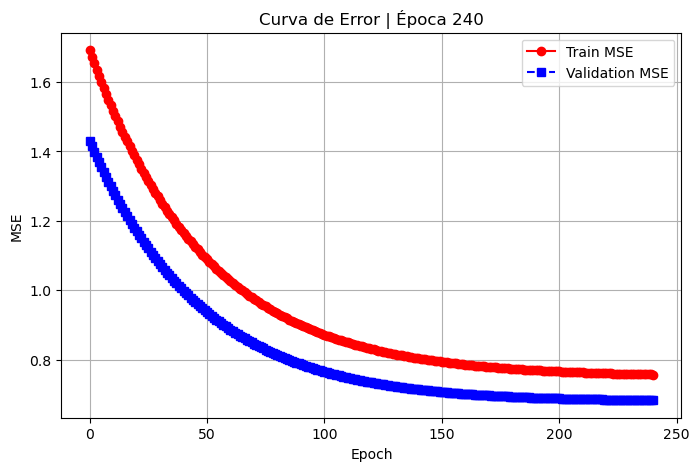

Época 320:
   → Loss (Training) = 0.75209
   → Loss (Validation) = 0.68167


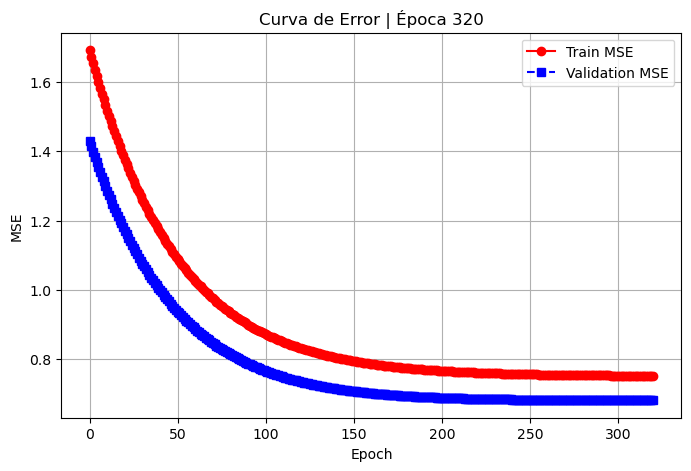

Época 400:
   → Loss (Training) = 0.75100
   → Loss (Validation) = 0.68192


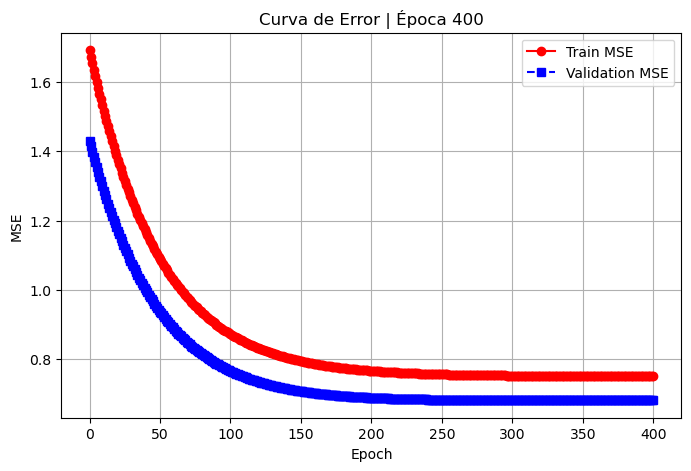

Valor de función de perdida (Loss Function) para testing = 0.79230


In [54]:
w, b = entrenar(X1_train, y1_train, X1_val, y1_val, epochs=400, alfa=0.005, plot_cada_n=80)
testear(w, b, X1_test, y1_test)

## Correr training con selección de features #2
Dataset con pies cuadrados y tamaño del lote.

Valores iniciales:, B = 0.45046, W = [0.02368815 0.90289667]
Época 400:
   → Loss (Training) = 0.49971
   → Loss (Validation) = 0.45431


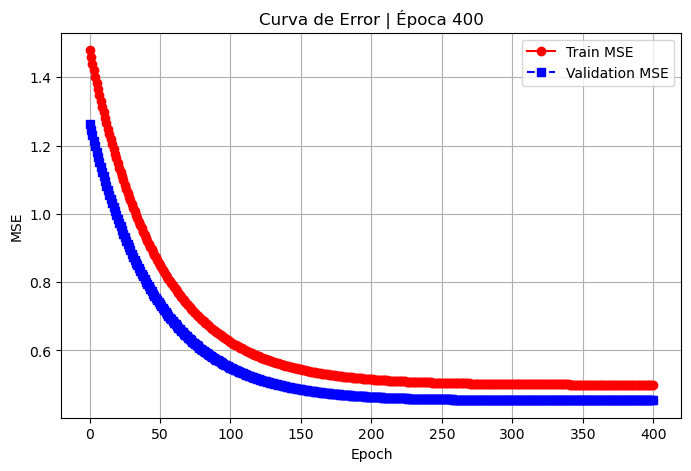

Valor de función de perdida (Loss Function) para testing = 0.52048


In [37]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=400, alfa=0.005, plot_cada_n=400)
testear(w, b, X2_test, y2_test)

Valores iniciales:, B = 0.46907, W = [0.54356606 0.29034981]
Época 300:
   → Loss (Training) = 0.50019
   → Loss (Validation) = 0.45269


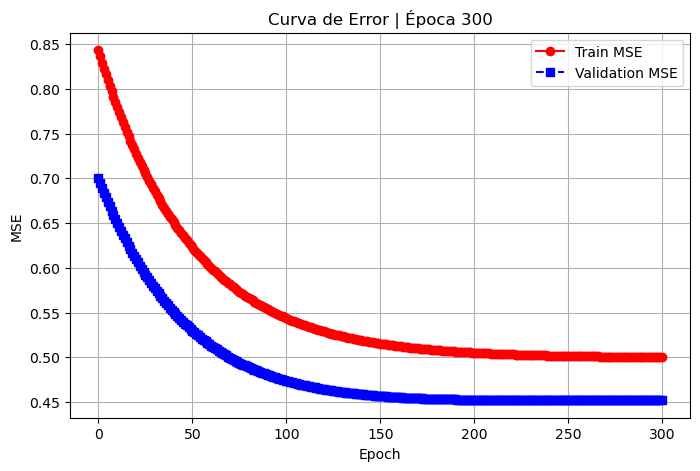

Valor de función de perdida (Loss Function) para testing = 0.52160


In [38]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=300, alfa=0.005, plot_cada_n=300)
testear(w, b, X2_test, y2_test)

Valores iniciales:, B = 0.88784, W = [0.07422893 0.3519957 ]
Época 500:
   → Loss (Training) = 0.49949
   → Loss (Validation) = 0.45400


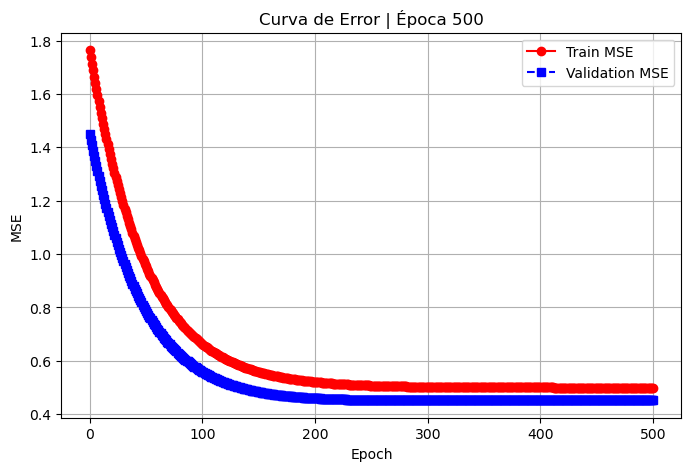

Valor de función de perdida (Loss Function) para testing = 0.52102


In [39]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=500, alfa=0.005, plot_cada_n=500)
testear(w, b, X2_test, y2_test)

Valores iniciales:, B = 0.61347, W = [0.25769332 0.02244298]
Época 500:
   → Loss (Training) = 0.49965
   → Loss (Validation) = 0.45333


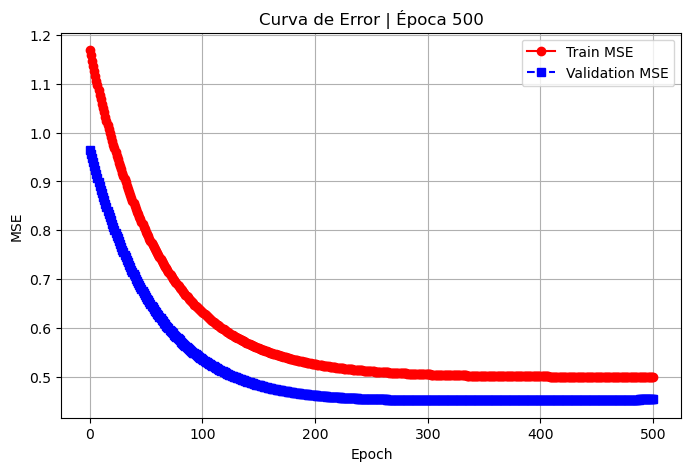

Valor de función de perdida (Loss Function) para testing = 0.52165


In [40]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=500, alfa=0.004, plot_cada_n=500)
testear(w, b, X2_test, y2_test)

#### Conclusión de selección de features #2
Parece que el modelo funciona mejor con 500 epochs y alfa = 0.004. Con menos epochs el modelo empeora y con alfa mayor empieza a tener un valor de loss function para testing promedio mayor. 



Valores iniciales:, B = 0.72839, W = [0.76657419 0.22673277]
Época 100:
   → Loss (Training) = 0.61341
   → Loss (Validation) = 0.52543


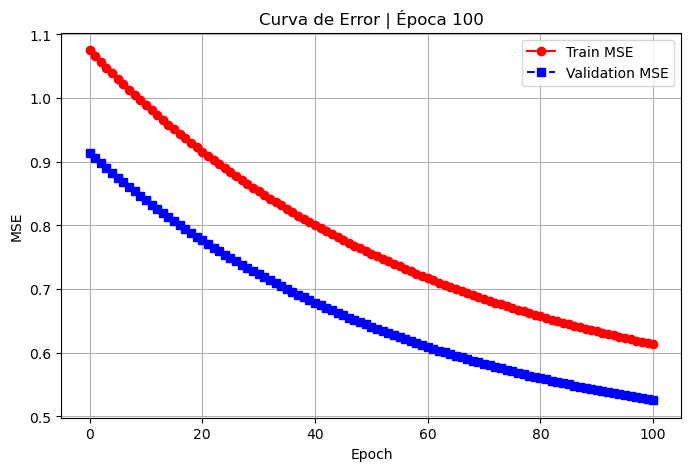

Época 200:
   → Loss (Training) = 0.52205
   → Loss (Validation) = 0.45953


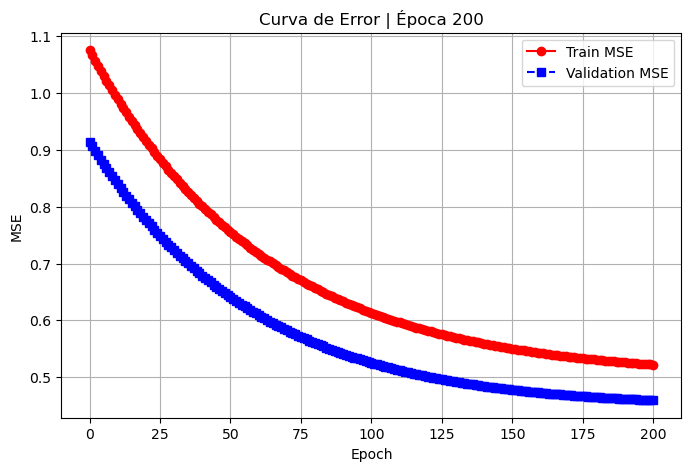

Época 300:
   → Loss (Training) = 0.50394
   → Loss (Validation) = 0.45147


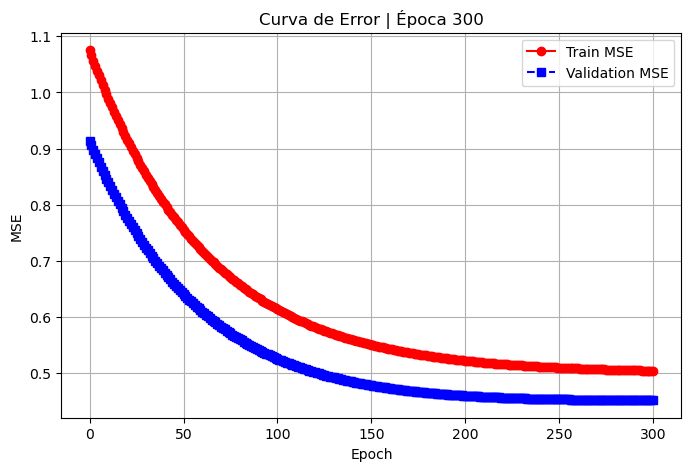

Época 400:
   → Loss (Training) = 0.50034
   → Loss (Validation) = 0.45214


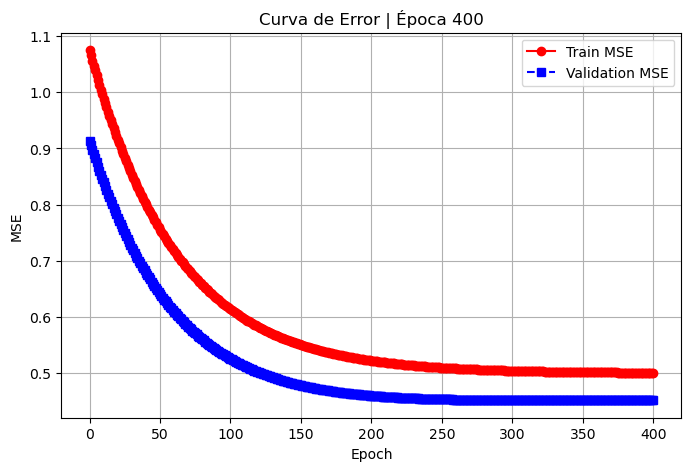

Época 500:
   → Loss (Training) = 0.49962
   → Loss (Validation) = 0.45329


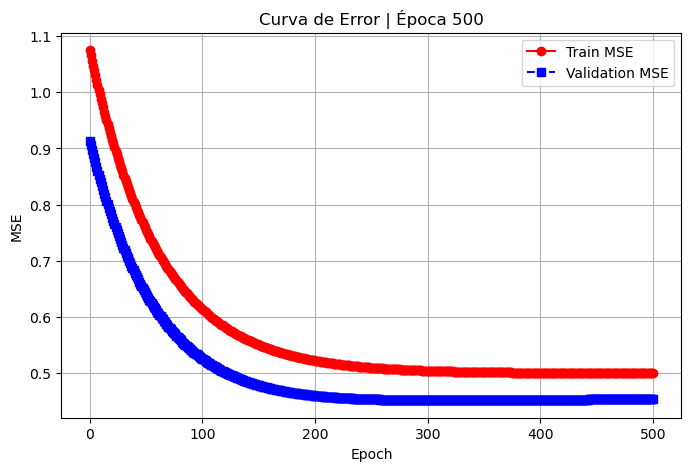

Valor de función de perdida (Loss Function) para testing = 0.52113


In [41]:
w, b = entrenar(X2_train, y2_train, X2_val, y2_val, epochs=500, alfa=0.004, plot_cada_n=100)
testear(w, b, X2_test, y2_test)

## Correr training con selección de features #3
Dataset con pies cuadrados.

Valores iniciales:, B = 0.44692, W = [0.18634964]
Época 500:
   → Loss (Training) = 0.01774
   → Loss (Validation) = 0.01744


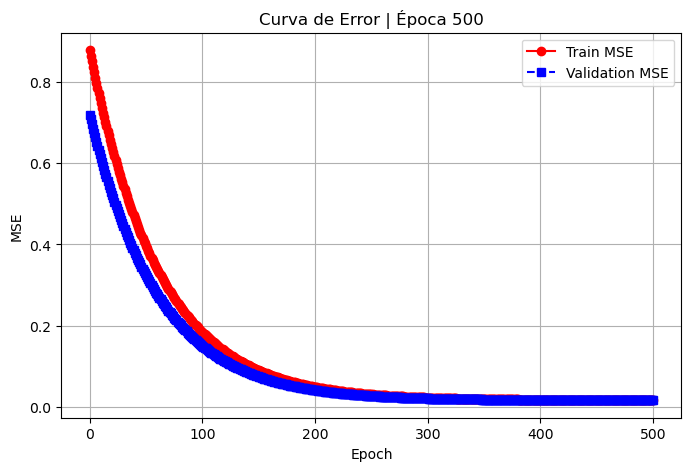

Valor de función de perdida (Loss Function) para testing = 0.01777


In [42]:
w, b = entrenar(X3_train, y3_train, X3_val, y3_val, epochs=500, alfa=0.004, plot_cada_n=500)
testear(w, b, X3_test, y3_test)

Valores iniciales:, B = 0.96614, W = [0.93031988]
Época 1000:
   → Loss (Training) = 0.01750
   → Loss (Validation) = 0.01742


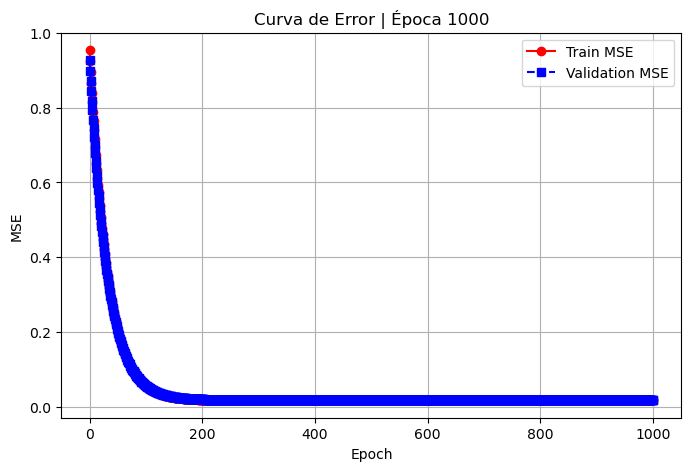

Valor de función de perdida (Loss Function) para testing = 0.01692


In [46]:
w, b = entrenar(X3_train, y3_train, X3_val, y3_val, epochs=1000, alfa=0.008, plot_cada_n=1000)
testear(w, b, X3_test, y3_test)

Valores iniciales:, B = 0.53278, W = [0.86971142]
Época 400:
   → Loss (Training) = 0.01750
   → Loss (Validation) = 0.01744


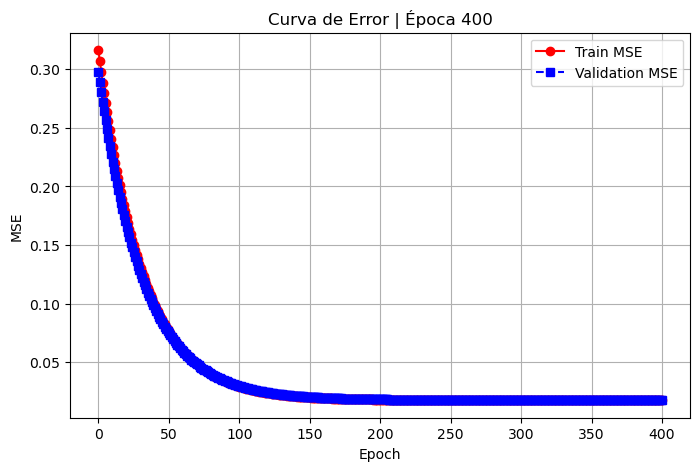

Valor de función de perdida (Loss Function) para testing = 0.01693


In [52]:
w, b = entrenar(X3_train, y3_train, X3_val, y3_val, epochs=400, alfa=0.008, plot_cada_n=400)
testear(w, b, X3_test, y3_test)

Valores iniciales:, B = 0.96511, W = [0.60508207]
Época 300:
   → Loss (Training) = 0.01995
   → Loss (Validation) = 0.02011


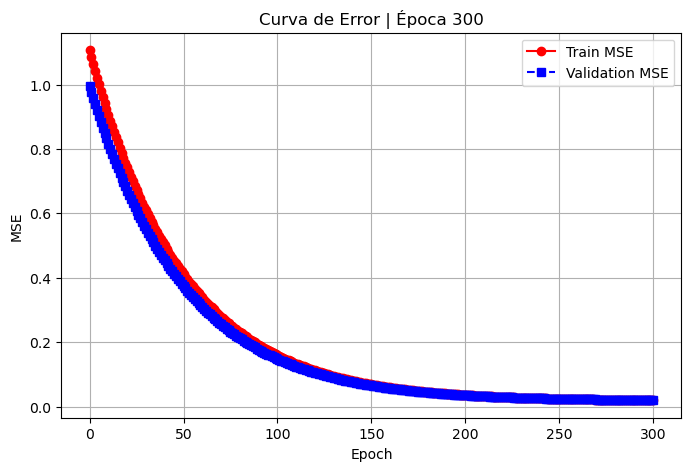

Valor de función de perdida (Loss Function) para testing = 0.02006


In [48]:
w, b = entrenar(X3_train, y3_train, X3_val, y3_val, epochs=300, alfa=0.005, plot_cada_n=300)
testear(w, b, X3_test, y3_test)

#### Conclusión de selección de features #3
Parece que el modelo funciona mejor con 400 epochs y alfa = 0.008. Aumentar los epochs o el valor de alfa podrían llevar al modelo a un sesgo mayor y bajar el valor de alfa o los epochs empeora un poco el modelo.

Valores iniciales:, B = 0.51502, W = [0.45070037]
Época 50:
   → Loss (Training) = 0.12664
   → Loss (Validation) = 0.10510


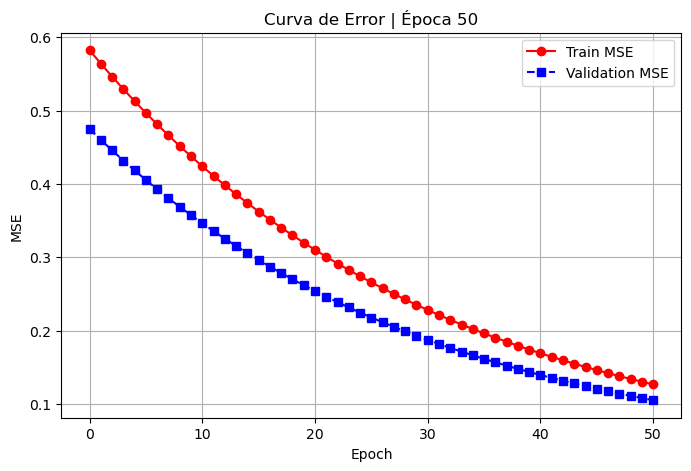

Época 100:
   → Loss (Training) = 0.03859
   → Loss (Validation) = 0.03404


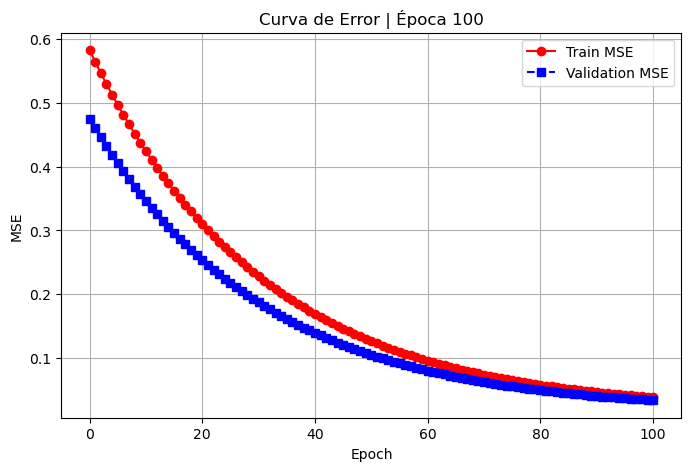

Época 150:
   → Loss (Training) = 0.02158
   → Loss (Validation) = 0.02050


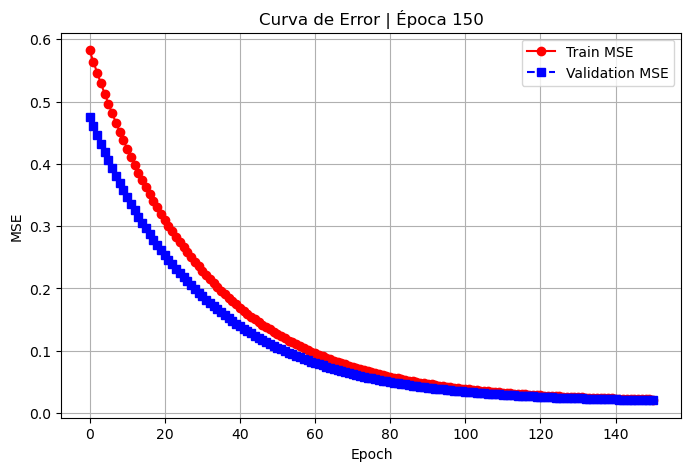

Época 200:
   → Loss (Training) = 0.01829
   → Loss (Validation) = 0.01796


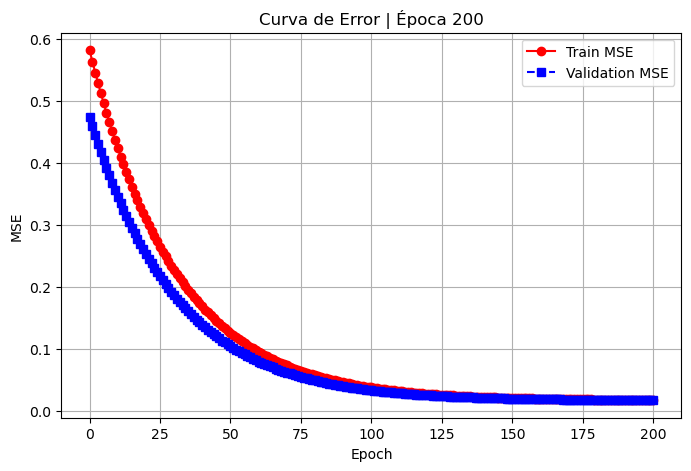

Época 250:
   → Loss (Training) = 0.01766
   → Loss (Validation) = 0.01750


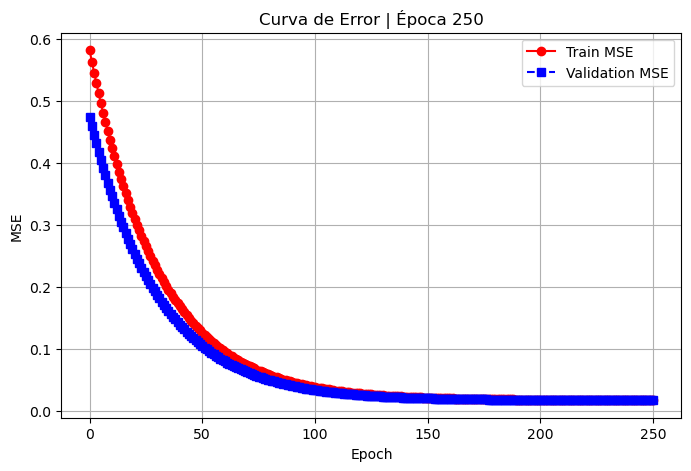

Época 300:
   → Loss (Training) = 0.01753
   → Loss (Validation) = 0.01743


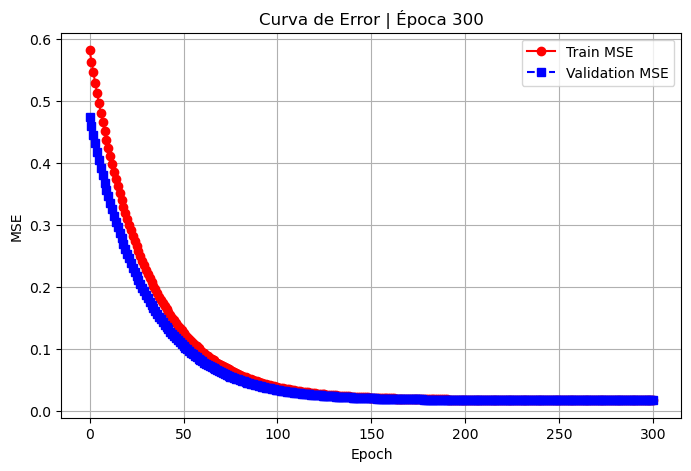

Época 350:
   → Loss (Training) = 0.01751
   → Loss (Validation) = 0.01742


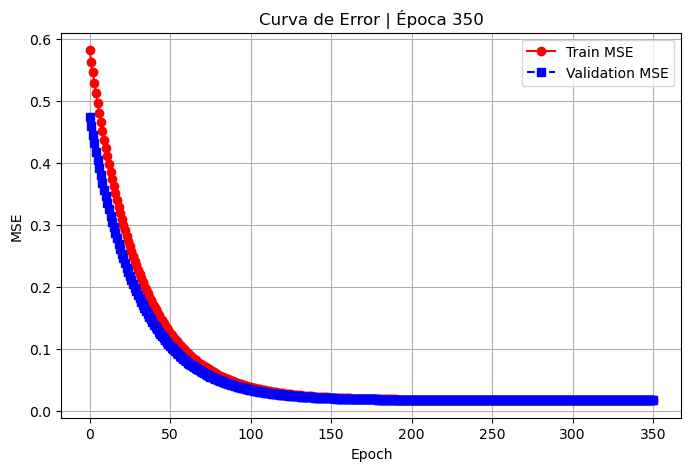

Época 400:
   → Loss (Training) = 0.01751
   → Loss (Validation) = 0.01742


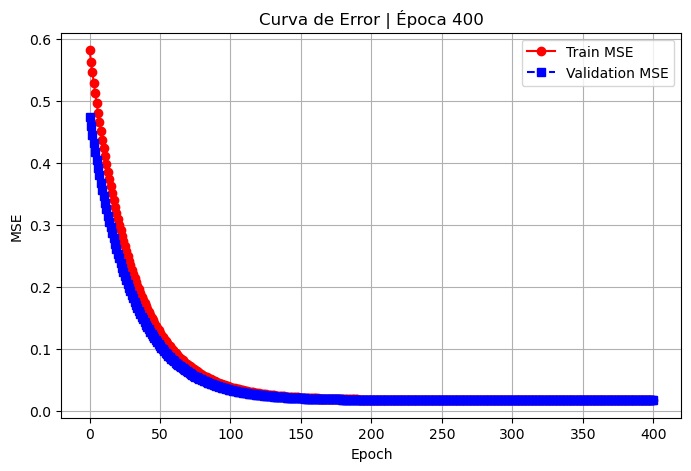

Valor de función de perdida (Loss Function) para testing = 0.01696


In [53]:
w, b = entrenar(X3_train, y3_train, X3_val, y3_val, epochs=400, alfa=0.008, plot_cada_n=50)
testear(w, b, X3_test, y3_test)

## Análisis de Sesgo y Varianza

### Modelo con todos los features
- **Pérdida de entrenamiento:** Disminuye consistentemente hasta la época 100.
- **Pérdida de validación:** También disminuye, pero se estabilizae en la época 200.
- **Varianza:** La diferencia entre la pérdida de entrenamiento y validación es moderada (~0.08), lo que indica que el modelo tiene una varianza moderada.
- **Sesgo:** La pérdida de validación no es muy baja en comparación con los otros modelos, lo que sugiere que el modelo podría tener un sesgo ligeramente alto, posiblemente debido a ruido en los datos adicionales.

### Modelo con pies cuadrados, año de construcción, tamaño del lote y tamaño del garaje
- **Pérdida de entrenamiento:** Disminuye consistentemente hasta la época 200.
- **Pérdida de validación:** Disminuye consistentemente hasta la época 200.
- **Varianza:** La diferencia entre la pérdida de entrenamiento y validación es pequeña (~0.07), lo que indica una buena generalización.
- **Sesgo:** La pérdida de validación es menor que en el primer modelo, lo que sugiere que el modelo tiene un mejor equilibrio entre sesgo y varianza.

### Modelo con pies cuadrados y tamaño del lote
- **Pérdida de entrenamiento:** Disminuye consistentemente hasta la época 300.
- **Pérdida de validación:** Disminuye consistentemente hasta la época 300.
- **Varianza:** La diferencia entre la pérdida de entrenamiento y validación es mínima (~0.05), lo que indica una excelente generalización.
- **Sesgo:** La pérdida de validación es la más baja de los tres modelos hasta el momento, lo que sugiere que el modelo tiene un bajo sesgo y está capturando bien los patrones en los datos.

### Modelo con pies cuadrados
- **Pérdida de entrenamiento:** Disminuye consistentemente hasta la época 150.
- **Pérdida de validación:** Disminuye consistentemente hasta la época 150.
- **Varianza:** La diferencia entre la pérdida de entrenamiento y validación es mínima (~0.001), lo que indica una excelente generalización para el dataset específico.
- **Sesgo:** La pérdida de validación es la más baja de los cuatro modelos en total, lo que sugiere que el modelo tiene un bajo sesgo y está capturando bien los patrones en los datos.

## Selección del Mejor Modelo
El modelo con **pies cuadrados** tiene la menor pérdida de validación y una diferencia mínima entre entrenamiento y validación, lo que indica un buen balance entre sesgo y varianza. Por lo tanto, este es el modelo que elegimos de los cuatro que probamos.